## tm_high_order.py

Temporal Memoryのいくつかの機能を示す簡単なチュートリアルです。

以下のプログラムは、いくつかの
時間記憶の基本的な特性、特にそれが来るときには
を使用して、高次のシーケンスをどのように処理するかを確認します。

In [1]:
import numpy as np
import random
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
from nupic.bindings.algorithms import TemporalMemory as TM

In [4]:
def accuracy(current, predicted):
  """
  予測に基づいて時間ステップtにおけるTMの精度を計算します。
  での現在のアクティブなカラムと，タイムステップ t-1 での現在のアクティブな
  カラムを表します．
  
  @param current (array) 現在のアクティブなカラムを含むバイナリベクトル．
  @param predicted (array) アクティブなカラムを予測したバイナリベクトル
  
  @return acc (float) タイムステップ t における TM の予測精度
  """  
  accuracy = 0
  if np.count_nonzero(predicted) > 0:
    accuracy = float(np.dot(current, predicted))/float(np.count_nonzero(predicted))
  return accuracy

In [5]:
def corruptVector(v1, noiseLevel, numActiveCols):
  """
  バイナリベクトルのコピーを、そのビットの noiseLevel をパーセント反転させることで
  破損させます。
  
  @param v1 (array) コピーが破損するバイナリベクトル．
  @param noiseLevel （float） 新しいベ ク タ ーに適用 さ れたい ノ イ ズ量。
  @param numActiveCols (int) 入力を表す疎な列の数。
  
  @return v2 (array) の破損したバイナリベクタ
  """  
  size = len(v1)
  v2 = np.zeros(size, dtype="uint32")
  bitsToSwap = int(noiseLevel * numActiveCols)
  # Copy the contents of v1 into v2
  for i in range(size):
    v2[i] = v1[i]
  for _ in range(bitsToSwap):
    i = random.randrange(size)
    if v2[i] == 1:
      v2[i] = 0
    else:
      v2[i] = 1
  return v2

In [6]:
def showPredictions():
  """
  A,B,C,D,X,の文字が提示されたときのTMの予測を示しています。
  文脈情報のないY、つまりシーケンス内に埋め込まれていない
  """   
  for k in range(6):
    tm.reset()
    print "--- " + "ABCDXY"[k] + " ---"
    tm.compute(set(seqT[k][:].nonzero()[0].tolist()), learn=False)
    activeColumnsIndices = [tm.columnForCell(i) for i in tm.getActiveCells()]
    predictedColumnIndices = [tm.columnForCell(i) for i in tm.getPredictiveCells()]  
    currentColumns = [1 if i in activeColumnsIndices else 0 for i in range(tm.numberOfColumns())]
    predictedColumns = [1 if i in predictedColumnIndices else 0 for i in range(tm.numberOfColumns())]
    print("Active cols: " + str(np.nonzero(currentColumns)[0]))
    print("Predicted cols: " + str(np.nonzero(predictedColumns)[0]))
    print ""

In [7]:
def trainTM(sequence, timeSteps, noiseLevel):
  """
  与えられた時間ステップ数と入力レベルに対して、与えられたシーケンスでTMを学習します。
  腐敗
  
  @param sequence (array) 行が入力文字である配列
  @param timeSteps (int) TM がシーケンスで提示される時間ステップの数
  @param noiseLevel （float） シーケンス内のキ ャ ラ ク タ に適用 し たい ノ イ ズの量。
  """
  currentColumns = np.zeros(tm.numberOfColumns(), dtype="uint32")
  predictedColumns = np.zeros(tm.numberOfColumns(), dtype="uint32")
  ts = 0  
  for t in range(timeSteps):
    tm.reset()
    for k in range(4):
      v = corruptVector(sequence[k][:], noiseLevel, sparseCols)
      tm.compute(set(v[:].nonzero()[0].tolist()), learn=True)
      activeColumnsIndices = [tm.columnForCell(i) for i in tm.getActiveCells()]
      predictedColumnIndices = [tm.columnForCell(i) for i in tm.getPredictiveCells()]
      currentColumns = [1 if i in activeColumnsIndices else 0 for i in range(tm.numberOfColumns())]
      acc = accuracy(currentColumns, predictedColumns)
      x.append(ts)
      y.append(acc)
      ts += 1
      predictedColumns = [1 if i in predictedColumnIndices else 0 for i in range(tm.numberOfColumns())]

In [11]:
uintType = "uint32"
random.seed(1)

tm = TM(columnDimensions = (2048,),
  cellsPerColumn=8,
  initialPermanence=0.21,
  connectedPermanence=0.3,
  minThreshold=15,
  maxNewSynapseCount=40,
  permanenceIncrement=0.1,
  permanenceDecrement=0.1,
  activationThreshold=15,
  predictedSegmentDecrement=0.01,
  )

sparsity = 0.02
sparseCols = int(tm.numberOfColumns() * sparsity)

# 文字A, B, C, D, X, Yの疎な表現を作成します
# この例では手動で作成していますが，通常は
# 空間プーラーを使ってビルドしてください。
seq1 = np.zeros((4, tm.numberOfColumns()), dtype="uint32")
seq1[0, 0:sparseCols] = 1  # Input SDR representing "A"
seq1[1, sparseCols:2*sparseCols] = 1   # Input SDR representing "B"
seq1[2, 2*sparseCols:3*sparseCols] = 1   # Input SDR representing "C"
seq1[3, 3*sparseCols:4*sparseCols] = 1   # Input SDR representing "D"

print"---seq1------------------------"
print seq1
print"-------------------------------"

seq2 = np.zeros((4, tm.numberOfColumns()), dtype="uint32")
seq2[0, 4*sparseCols:5*sparseCols] = 1   # Input SDR representing "X"
seq2[1, sparseCols:2*sparseCols] = 1   # Input SDR representing "B"
seq2[2, 2*sparseCols:3*sparseCols] = 1   # Input SDR representing "C"
seq2[3, 5*sparseCols:6*sparseCols] = 1   # Input SDR representing "Y"

print"---seq2------------------------"
print seq2
print"-------------------------------"

seqT = np.zeros((6, tm.numberOfColumns()), dtype="uint32")
seqT[0, 0:sparseCols] = 1  # Input SDR representing "A"
seqT[1, sparseCols:2*sparseCols] = 1   # Input SDR representing "B"
seqT[2, 2*sparseCols:3*sparseCols] = 1   # Input SDR representing "C"
seqT[3, 3*sparseCols:4*sparseCols] = 1   # Input SDR representing "D"
seqT[4, 4*sparseCols:5*sparseCols] = 1   # Input SDR representing "X"
seqT[5, 5*sparseCols:6*sparseCols] = 1   # Input SDR representing "Y"

print"---seqT------------------------"
print seqT
print"-------------------------------"

---seq1------------------------
[[1 1 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
-------------------------------
---seq2------------------------
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
-------------------------------
---seqT------------------------
[[1 1 1 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
-------------------------------



--------------------------------------------------
Part 1. 我々はTMに配列ABCDを提示する。TMは最終的に
はシーケンスを学習して、今後の文字を予測します。これは
図１の予測精度で測定した
N.B. TMが出力しないため，シーケンスの間では精度は0.0になります
N.B. とは「特別な注意が何かに払われなければならないことを示すの
に用いられるラテン語のフレーズ」
任意の予測
--------------------------------------------------



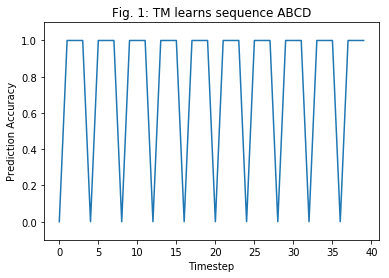


--------------------------------------------------
TMがABCDのシーケンスを学習したら，個体を提示します
予測を知るためにTMに文字を出力する。TMはcolumnsを出力する
登場時に活躍する
次のタイムステップで予測されたcolumnsとして。ここでは、
AはBを予測し、BはCを予測し、CはDを予測し、Dは何も出力しない
予測
N.B.ここでは、個々の文字を提示しています。
シーケンスのコンテキストを奪われた。文字の予測はできません
XとYをTMに提示していないため，どのような順序でもXとYを表示する
--------------------------------------------------

--- A ---
Active cols: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Predicted cols: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]

--- B ---
Active cols: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Predicted cols: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]

--- C ---
Active cols: [ 80  81  82  83  84  85  86 

In [18]:
# PART 1. TMにシーケンス "ABCD "を与える。TMは最終的に学習します
# パターンとその予測精度は1.0になります(シーケンスの間を除く)
# TMが予測を出力しない場合)
print ""
print "-"*50
print "Part 1. 我々はTMに配列ABCDを提示する。TMは最終的に"
print "はシーケンスを学習して、今後の文字を予測します。これは"
print "図１の予測精度で測定した"
print "N.B. TMが出力しないため，シーケンスの間では精度は0.0になります"
print "N.B. とは「特別な注意が何かに払われなければならないことを示すの"
print "に用いられるラテン語のフレーズ」"
print "任意の予測"
print "-"*50
print ""

x = []
y = []
trainTM(seq1, timeSteps=10, noiseLevel=0.0)

plt.ylim([-0.1,1.1])
plt.plot(x, y)
plt.xlabel("Timestep")
plt.ylabel("Prediction Accuracy")
plt.title("Fig. 1: TM learns sequence ABCD")
plt.savefig("figure_1")
plt.show()

print ""
print "-"*50
print "TMがABCDのシーケンスを学習したら，個体を提示します"
print "予測を知るためにTMに文字を出力する。TMはcolumnsを出力する"
print "登場時に活躍する"
print "次のタイムステップで予測されたcolumnsとして。ここでは、"
print "AはBを予測し、BはCを予測し、CはDを予測し、Dは何も出力しない"
print "予測"
print "N.B.ここでは、個々の文字を提示しています。"
print "シーケンスのコンテキストを奪われた。文字の予測はできません"
print "XとYをTMに提示していないため，どのような順序でもXとYを表示する"
print "-"*50
print ""

showPredictions()


--------------------------------------------------
パート2. TMにシーケンスXBCYを提示します。予想通り、精度は
TMが新しいシーケンスを学習するまでドロップする（図2）。の予測はどうなるか
シーケンスBCが提示された場合のTM? これはどの文字に依存します。
これは高次配列の重要な特徴である。
--------------------------------------------------



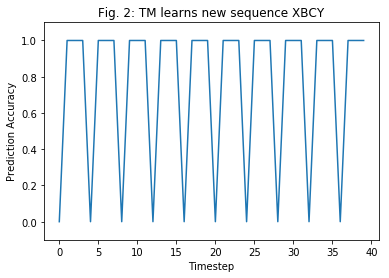


--------------------------------------------------
もう一度、それぞれの文字を個別にTMに提示します、つまり
2つのシーケンスのいずれにも含まれていません。文字 A が提示されたとき TM
Bを予測し、BはCを予測しますが、今回はCが同時予測を出力します
曖昧性を解消するために、TMは 'DとYの両方'を表示する必要があります。
前の文字はABかXBでした。文字 X が提示されたとき TM
Bを予測しますが、YとDは予測しません。
--------------------------------------------------

--- A ---
Active cols: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Predicted cols: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]

--- B ---
Active cols: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Predicted cols: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]

--- C ---
Active cols: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96

In [23]:

# パート2. TMにシーケンスXBCYを提示します。予想通り、精度は
# TMが新しいシーケンスを学習するまでドロップする（図2）。の予測はどうなるか
# シーケンスBCが提示された場合のTM? これはどの文字に依存します。
# これは高次配列の重要な特徴である。

print ""
print "-"*50
print "パート2. TMにシーケンスXBCYを提示します。予想通り、精度は"
print "TMが新しいシーケンスを学習するまでドロップする（図2）。の予測はどうなるか"
print "シーケンスBCが提示された場合のTM? これはどの文字に依存します。"
print "これは高次配列の重要な特徴である。"
print "-"*50
print ""

x = []
y = []
trainTM(seq2, timeSteps=10, noiseLevel=0.0)

# この図では、TMがどのようにして、特定の
# の文字（プロットのトゲ）が出てきます。そして，予測の半分は当たることになりますが，
# それは文字Cが提示されている時間に対応しています。
# XBCYという配列を正しく学習し、それに応じて文字を予測します。

plt.ylim([-0.1,1.1])
plt.plot(x, y)
plt.xlabel("Timestep")
plt.ylabel("Prediction Accuracy")
plt.title("Fig. 2: TM learns new sequence XBCY")
plt.savefig("figure_2")
plt.show()

print ""
print "-"*50
print "もう一度、それぞれの文字を個別にTMに提示します、つまり"
print "2つのシーケンスのいずれにも含まれていません。文字 A が提示されたとき TM"
print "Bを予測し、BはCを予測しますが、今回はCが同時予測を出力します"
print "曖昧性を解消するために、TMは 'DとYの両方'を表示する必要があります。"
print "前の文字はABかXBでした。文字 X が提示されたとき TM"
print "Bを予測しますが、YとDは予測しません。"
print "-"*50
print ""

showPredictions()


--------------------------------------------------
Part 3. ベクトル中のビットの30%を破壊することにより、シーケンスXBCYに
ノイズを加える
各文字をエンコードします。になると予測精度が低下することが予想されます。
TMは入力のランダムノイズを学習できない(図3)。しかし、この減少は
と表示されます。
--------------------------------------------------



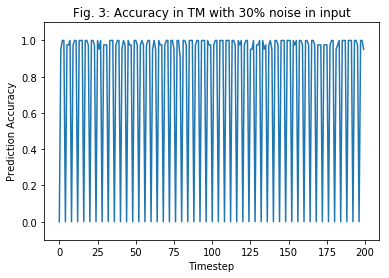


--------------------------------------------------
ノイズがある場合のTMの出力をもう一度見てみましょう
input (30%). ここでは、TMが影響を受けない程度の低ノイズである。
いつ'noisy'カラムが予測されているかを見たらそうなるだろう
と印刷すると、「個々の文字で提示されている」と表示されます。
このように、TMは '表示する 'と言うことができます。
入力のノイズに対する耐性
--------------------------------------------------

--- A ---
Active cols: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Predicted cols: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]

--- B ---
Active cols: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Predicted cols: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]

--- C ---
Active cols: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 1

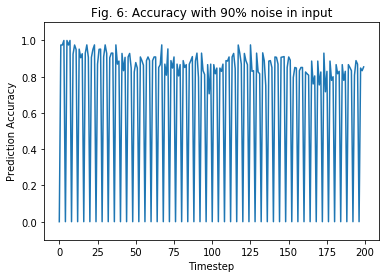

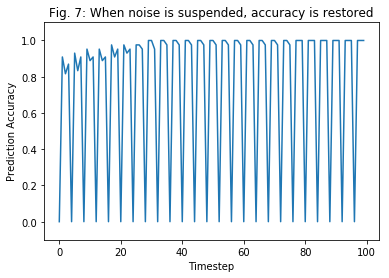


--------------------------------------------------
TM にノイズの多い入力を提示した後，元のシーケンスを提示します．
XBCYを再学習させるため。提示することでこれが達成されたことを検証します
その出力を観察します。繰り返しになりますが，
ノイズの多い'列が予測されなくなったことを確認してください。
シーケンスが提示されると予測精度は1.0に戻る（図7）
--------------------------------------------------

--- A ---
Active cols: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Predicted cols: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]

--- B ---
Active cols: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Predicted cols: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]

--- C ---
Active cols: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 

In [27]:
# PART 3. 今度はTMにノイズのある入力を提示します。シーケンスXBCYにノイズを加えます
# そのビットの30%を破壊することで の存在下でTMがどのように反応するか見てみたいと
# 思いますノイズとそこからどうやって回復するのか
print ""
print "-"*50
print "Part 3. ベクトル中のビットの30%を破壊することにより、シーケンスXBCYに"
print "ノイズを加える"
print "各文字をエンコードします。になると予測精度が低下することが予想されます。"
print "TMは入力のランダムノイズを学習できない(図3)。しかし、この減少は"
print "と表示されます。"
print "-"*50
print ""

x = []
y = []
trainTM(seq2, timeSteps=50, noiseLevel=0.3)

plt.ylim([-0.1,1.1])
plt.plot(x, y)
plt.xlabel("Timestep")
plt.ylabel("Prediction Accuracy")
plt.title("Fig. 3: Accuracy in TM with 30% noise in input")
plt.savefig("figure_3")
plt.show()

print ""
print "-"*50
print "ノイズがある場合のTMの出力をもう一度見てみましょう"
print "input (30%). ここでは、TMが影響を受けない程度の低ノイズである。"
print "いつ'noisy'カラムが予測されているかを見たらそうなるだろう"
print "と印刷すると、「個々の文字で提示されている」と表示されます。"
print "このように、TMは '表示する 'と言うことができます。"
print "入力のノイズに対する耐性"
print "-"*50
print ""

showPredictions()

# それぞれの文字に50%のノイズを加えることでシーケンスをさらに破壊してみましょう.
# ここでは, TMが個々のキャラクターと一緒に提示されています。

print ""
print "-"*50
print "さて、X, B, C, Yの文字のビット数の50%がノイズになるように設定します。"
print "予想通り，精度は低下し（図5），「ノイズの多い」columnsはTMによって予測された"
print "-"*50
print ""

x = []
y = []
trainTM(seq2, timeSteps=50, noiseLevel=0.5)

print ""
print "-"*50
print "ノイズがある場合のTMの出力をもう一度見てみましょう"
print "input. いくつかの文字 (例: X) の予測には、次のような列が含まれています。"
print "は他の文字とは関係ありません。これは、TMが学習しようとしたからです。"
print "入力パターンのノイズを表示します。"
print "-"*50
print ""

showPredictions()

plt.ylim([-0.1,1.1])
plt.plot(x, y)
plt.xlabel("Timestep")
plt.ylabel("Prediction Accuracy")
plt.title("Fig. 4: Accuracy in TM with 50% noise in input")
plt.savefig("figure_4")
plt.close()

# TMは前のステップで学習した'noisy'列を忘れることができるでしょうか？
# TMに元のシーケンスXBCYを提示します. そうすれば「ノイズの多い」columnsを忘れることが
# できるでしょう.
# columnsを忘れてしまいます.

x = []
y = []
trainTM(seq2, timeSteps=10, noiseLevel=0.0)

print ""
print "-"*50
print "元のシーケンスXBCYをTMに提示した後，次のようになると予想されます．"
print "前のステップで予測されたノイズの多い列が消える。我々はそれを検証します"
print "個々の文字をTMに提示することで"
print "-"*50
print ""

showPredictions()

# 予測精度が1.0に戻ったことがわかります（以前と同様に，シーケンス間ではありません）．
# TMがノイズの多いcolumnsを「忘れた」とき。

plt.ylim([-0.1,1.1])
plt.plot(x, y)
plt.xlabel("Timestep")
plt.ylabel("Prediction Accuracy")
plt.title("Fig. 5: TM forgets noise in sequence XBCY when noise is over")
plt.savefig("figure_5")
plt.close()

# シーケンスをさらに破壊して各文字に90%のノイズを加えてみましょう
# この場合，精度がさらに低下し，より多くの「ノイズの多い」文字が現れることが予想されます．
# 予測されている columns

print ""
print "-"*50
print "シーケンスXBCYの文字にさらにノイズを追加します。今回は"
print "「内容の90％が破損します。予想通り、精度が低下し（図6）、"
print "'noisy'columnsはTMによって予測されます。"
print "-"*50
print ""

x = []
y = []
trainTM(seq2, timeSteps=50, noiseLevel=0.9)

print ""
print "-"*50
print "次は、提示されたときのTMの出力を見てみましょう。"
print "シーケンスの個々の文字。前と同じように、我々は 'noisy' predictedを見る"
print "TMがノイズを学習しようとした結果として現れたcolumns"
print "-"*50
print ""

showPredictions()

# この図では，予測精度が入力に含まれるノイズの
# しかし、90%であっても精度は劇的に低下しません。
# これは、TMが入力のノイズに対してある程度の回復力を示すことを示唆しています。
# これは、よく学習された本当のパターンを簡単に忘れないことを意味します。

plt.ylim([-0.1,1.1])
plt.plot(x, y)
plt.xlabel("Timestep")
plt.ylabel("Prediction Accuracy")
plt.title("Fig. 6: Accuracy with 90% noise in input")
plt.savefig("figure_6")
plt.show()

# ノイズの多い列を忘れさせるために，元の配列をTMに提示してみよう．
# この後, TMは再び正確にシーケンスを予測し, その予測は次のようになる.
# 'noisy' カラムを含まないようにしました。

x = []
y = []
trainTM(seq2, timeSteps=25, noiseLevel=0.0)

# 予測精度がどのように1.0に戻るかを観察します(シーケンスの間ではなく)
# TMが元のシーケンスで提示されているので。

plt.ylim([-0.1,1.1])
plt.plot(x, y)
plt.xlabel("Timestep")
plt.ylabel("Prediction Accuracy")
plt.title("Fig. 7: When noise is suspended, accuracy is restored")
plt.savefig("figure_7")
plt.show()

# TMは予測精度を回復させ、個々の文字を提示するとそれを見ることができます.
# 予測されている列が騒がしくなることはありません。

print ""
print "-"*50
print "TM にノイズの多い入力を提示した後，元のシーケンスを提示します．"
print "XBCYを再学習させるため。提示することでこれが達成されたことを検証します"
print "その出力を観察します。繰り返しになりますが，"
print "ノイズの多い'列が予測されなくなったことを確認してください。"
print "シーケンスが提示されると予測精度は1.0に戻る（図7）"
print "-"*50
print ""

showPredictions()

In [31]:
# PART 4. さて，ABCDとXBCYの両方の配列をランダムにTMに提示します．
# この目的のために新しいTMから始めます.
# 文字Dを提示されたときのTMの出力は何になるでしょうか？
# ABCDとXBCYがランダムに次々に発生するシーケンスにさらされたことはありますか?
# TMが1/4の時間のうち1/4がABCDABCDの配列を見たとしたら, 別の1/4がXBCYの配列を見たとしたら
# TMはABCDXBCYを、別の四半期にはXBCYXBCYを、そして最後の四半期には
# XBCYABCDの場合、TMは文字D、Yの同時予測を示すことになります。
# とC。

print ""
print "-"*50
print "パート4. 我々はTMにランダムにABCDとXBCYの両方の配列を提示する。"
print "ここでは，TMが"
print "D, Y, C の文字が表示されます。"
print "NB. で各シーケンスを提示した後、ここではTMをリセットしません。"
print "TMにDとYの異なる予測を学習させる目的"
print "-"*50
print ""

tm = TM(columnDimensions = (2048,),
  cellsPerColumn=8,
  initialPermanence=0.21,
  connectedPermanence=0.3,
  minThreshold=15,
  maxNewSynapseCount=40,
  permanenceIncrement=0.1,
  permanenceDecrement=0.1,
  activationThreshold=15,
  predictedSegmentDecrement=0.01,
  )

for t in range(75):
  rnd = random.randrange(2)
  for k in range(4):
    if rnd == 0:
      tm.compute(set(seq1[k][:].nonzero()[0].tolist()), learn=True)
    else:
      tm.compute(set(seq2[k][:].nonzero()[0].tolist()), learn=True)

print ""
print "-"*50
print "個人を提示したときのTMの出力を見てみましょう"
print "文字 A, B, C, D, X, および Y."
print "文字D（AとXを予測）、文字Y（AとXを予測）、と表示されます。"
print "and when presented with character C (predicting D and Y)"
print "N.B. このスクリプトの確率論的な性質のため、同時の"
print "前述のすべての文字での予測値"
print "-"*50
print ""

showPredictions()

print ""
print "-*"*25
print "上にスクロールしてこのシンプルな展開を見る"
print "tutorial. ソースファイルを開いて詳細を見ることもできます"
print "スクリプトの各部分に関するコメント"
print "このスクリプトで生成されたすべての画像が保存されます"
print "現在の作業ディレクトリにある"
print "-*"*25
print ""


--------------------------------------------------
パート4. 我々はTMにランダムにABCDとXBCYの両方の配列を提示する。
ここでは，TMが
D, Y, C の文字が表示されます。
NB. で各シーケンスを提示した後、ここではTMをリセットしません。
TMにDとYの異なる予測を学習させる目的
--------------------------------------------------


--------------------------------------------------
個人を提示したときのTMの出力を見てみましょう
文字 A, B, C, D, X, および Y.
文字D（AとXを予測）、文字Y（AとXを予測）、と表示されます。
and when presented with character C (predicting D and Y)
N.B. このスクリプトの確率論的な性質のため、同時の
前述のすべての文字での予測値
--------------------------------------------------

--- A ---
Active cols: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Predicted cols: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]

--- B ---
Active cols: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Predicted cols: [ 80  81  82  83  84  85  86  87  88  